AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


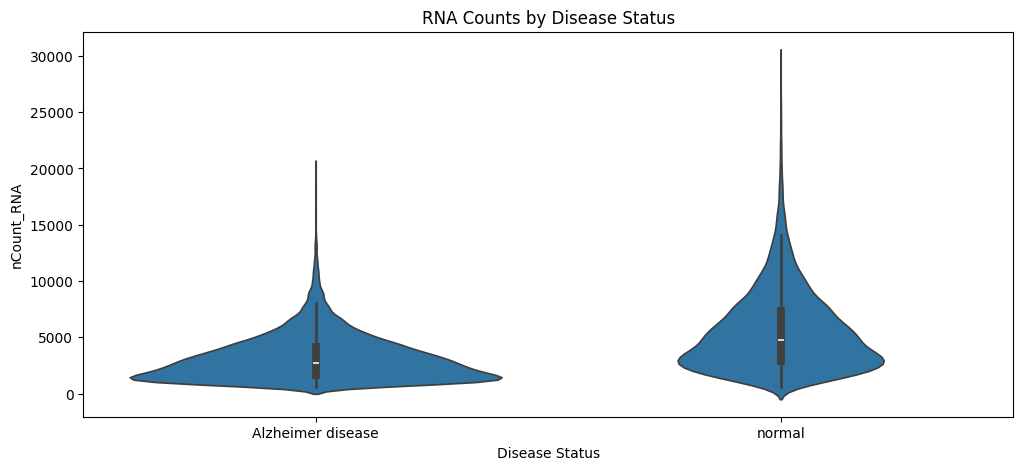

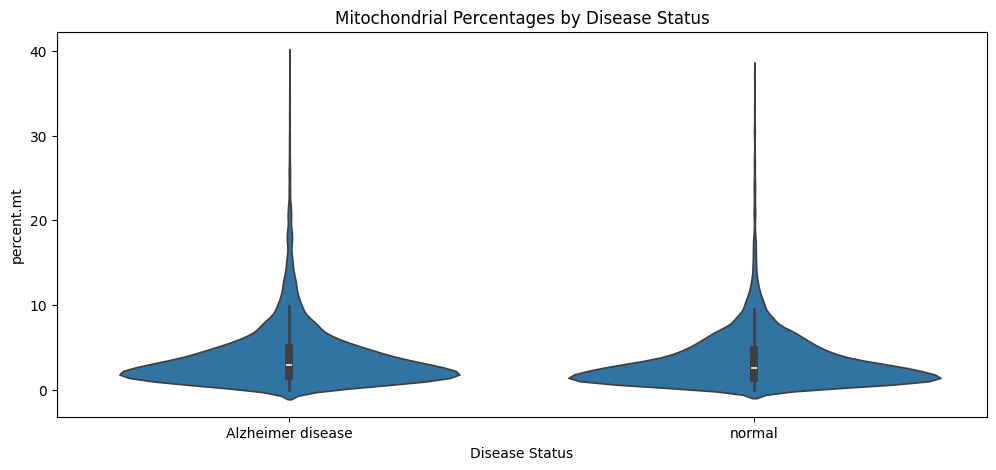

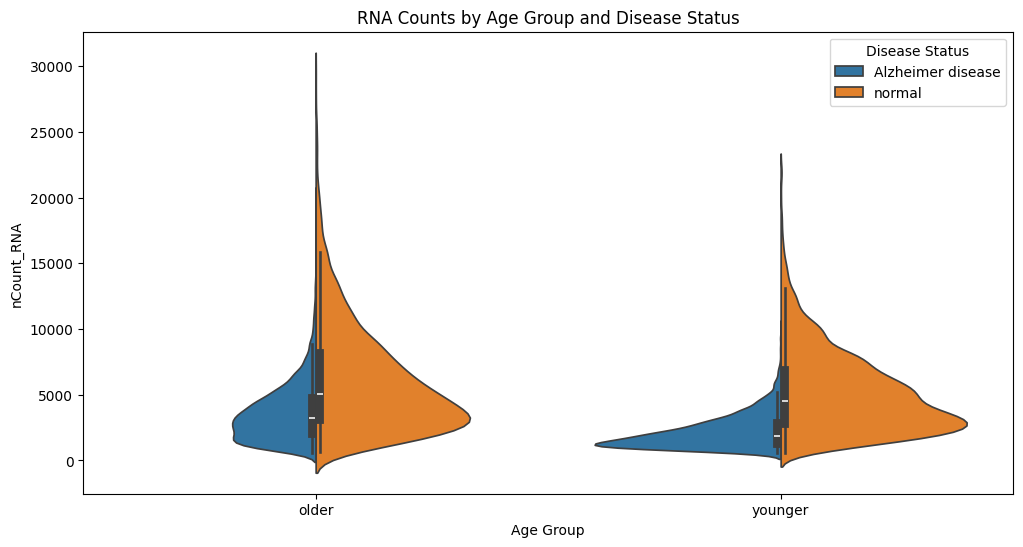

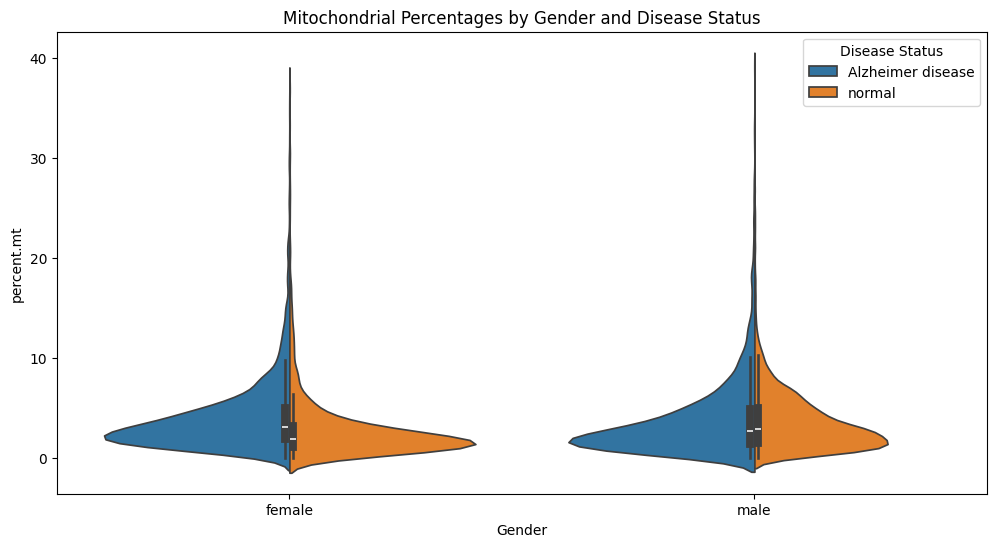

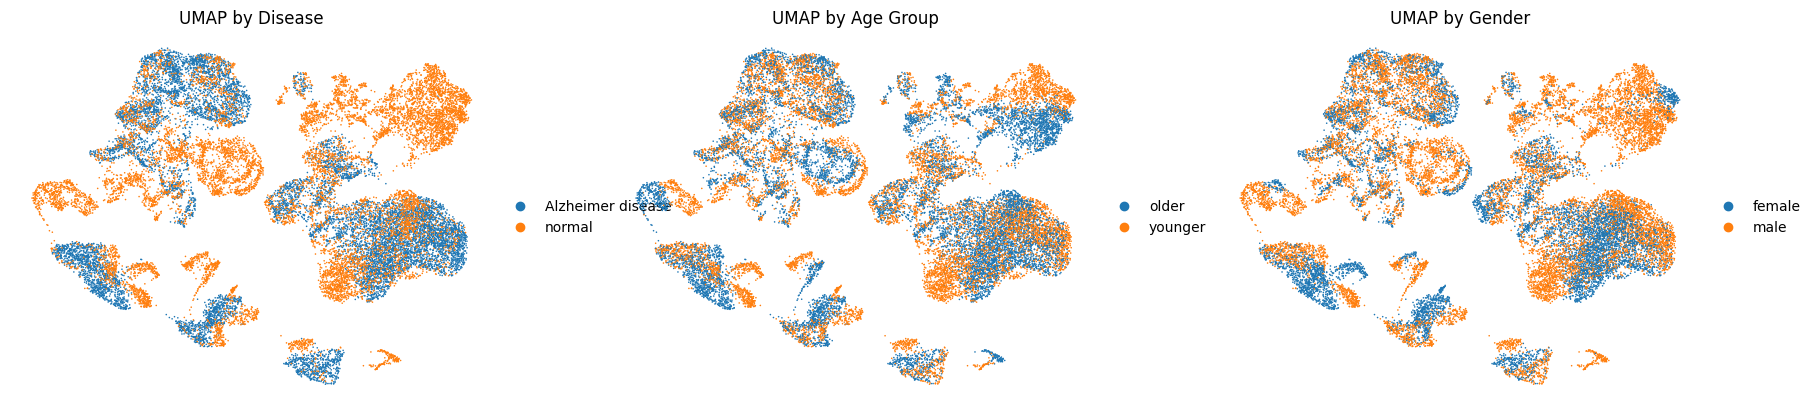

In [7]:
# Install necessary libraries and import them
!pip install scanpy matplotlib seaborn
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re

# Step 0: Download and load the dataset
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')
print(adata)

# Step 1: Extract age from 'development_stage' and filter by age range (57 to 89)
def extract_age(stage):
    match = re.search(r'\d+', stage)
    return int(match.group()) if match else None

adata.obs['age'] = adata.obs['development_stage'].apply(extract_age).astype(float)
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()

# Step 2: Filter by disease status (AD vs. normal)
adata_filtered = adata_filtered[adata_filtered.obs['disease'].isin(['Alzheimer disease', 'normal'])].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']

# Step 3: Analysis of RNA Counts and Mitochondrial Expression in AD vs. Normal

# Violin Plot for RNA counts by disease status
plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='nCount_RNA', data=adata_filtered.obs)
plt.title("RNA Counts by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("nCount_RNA")
plt.show()

# Violin Plot for mitochondrial gene expression by disease status
plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='percent.mt', data=adata_filtered.obs)
plt.title("Mitochondrial Percentages by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("percent.mt")
plt.show()

# Step 4: Further Analysis by Age Group and Gender in AD and Normal Groups

# Define age groups and gender for the analysis
adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')
adata_filtered.obs['gender'] = adata_filtered.obs['sex']

# Violin plot to analyze RNA counts by age group and disease status
plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='nCount_RNA', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("RNA Counts by Age Group and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("nCount_RNA")
plt.legend(title="Disease Status")
plt.show()

# Violin plot to analyze mitochondrial percentages by gender and disease status
plt.figure(figsize=(12, 6))
sns.violinplot(x='gender', y='percent.mt', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("Mitochondrial Percentages by Gender and Disease Status")
plt.xlabel("Gender")
plt.ylabel("percent.mt")
plt.legend(title="Disease Status")
plt.show()

# Step 5: UMAP visualization to detect cellular subpopulations in AD and normal cohorts
sc.tl.pca(adata_filtered, svd_solver='arpack')
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_filtered)
sc.pl.umap(adata_filtered, color=['disease_status', 'age_group', 'gender'], title=["UMAP by Disease", "UMAP by Age Group", "UMAP by Gender"], frameon=False)
